# Data Exploration - Advanced - Heart Failure Prediction

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

## Target 1
Let's start by loading the data and taking a look at the first few rows. Then we will explore the data to understand the structure and the meaning of the columns. I will print the variable list and select categorical and numerical variables to analyze. Then I will explore what kind of categorical values have the categorical variables and the distribution of the numerical variables.

In [113]:
with open("data/heart_failure_clinical_records_dataset.csv") as file:
    survey = pd.read_csv(file)
survey.head()

columns = []
for column in survey.columns:
    columns.append(column)
print(columns)

categorical_variables = ['anaemia', 'diabetes', 'high_blood_pressure']
numerical_variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

print("\nCategorical variables analysis")
for variable in categorical_variables:
    print(variable)
    print(survey[variable].unique())

print("\nNumerical variables analysis")    
for variable in numerical_variables:
    print(variable)
    print(survey[variable].describe())
    print("\n")


['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Categorical variables analysis
anaemia
[0 1]
diabetes
[0 1]
high_blood_pressure
[1 0]

Numerical variables analysis
age
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


creatinine_phosphokinase
count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64


ejection_fraction
count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64


platelets
count       299.000000
mea

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

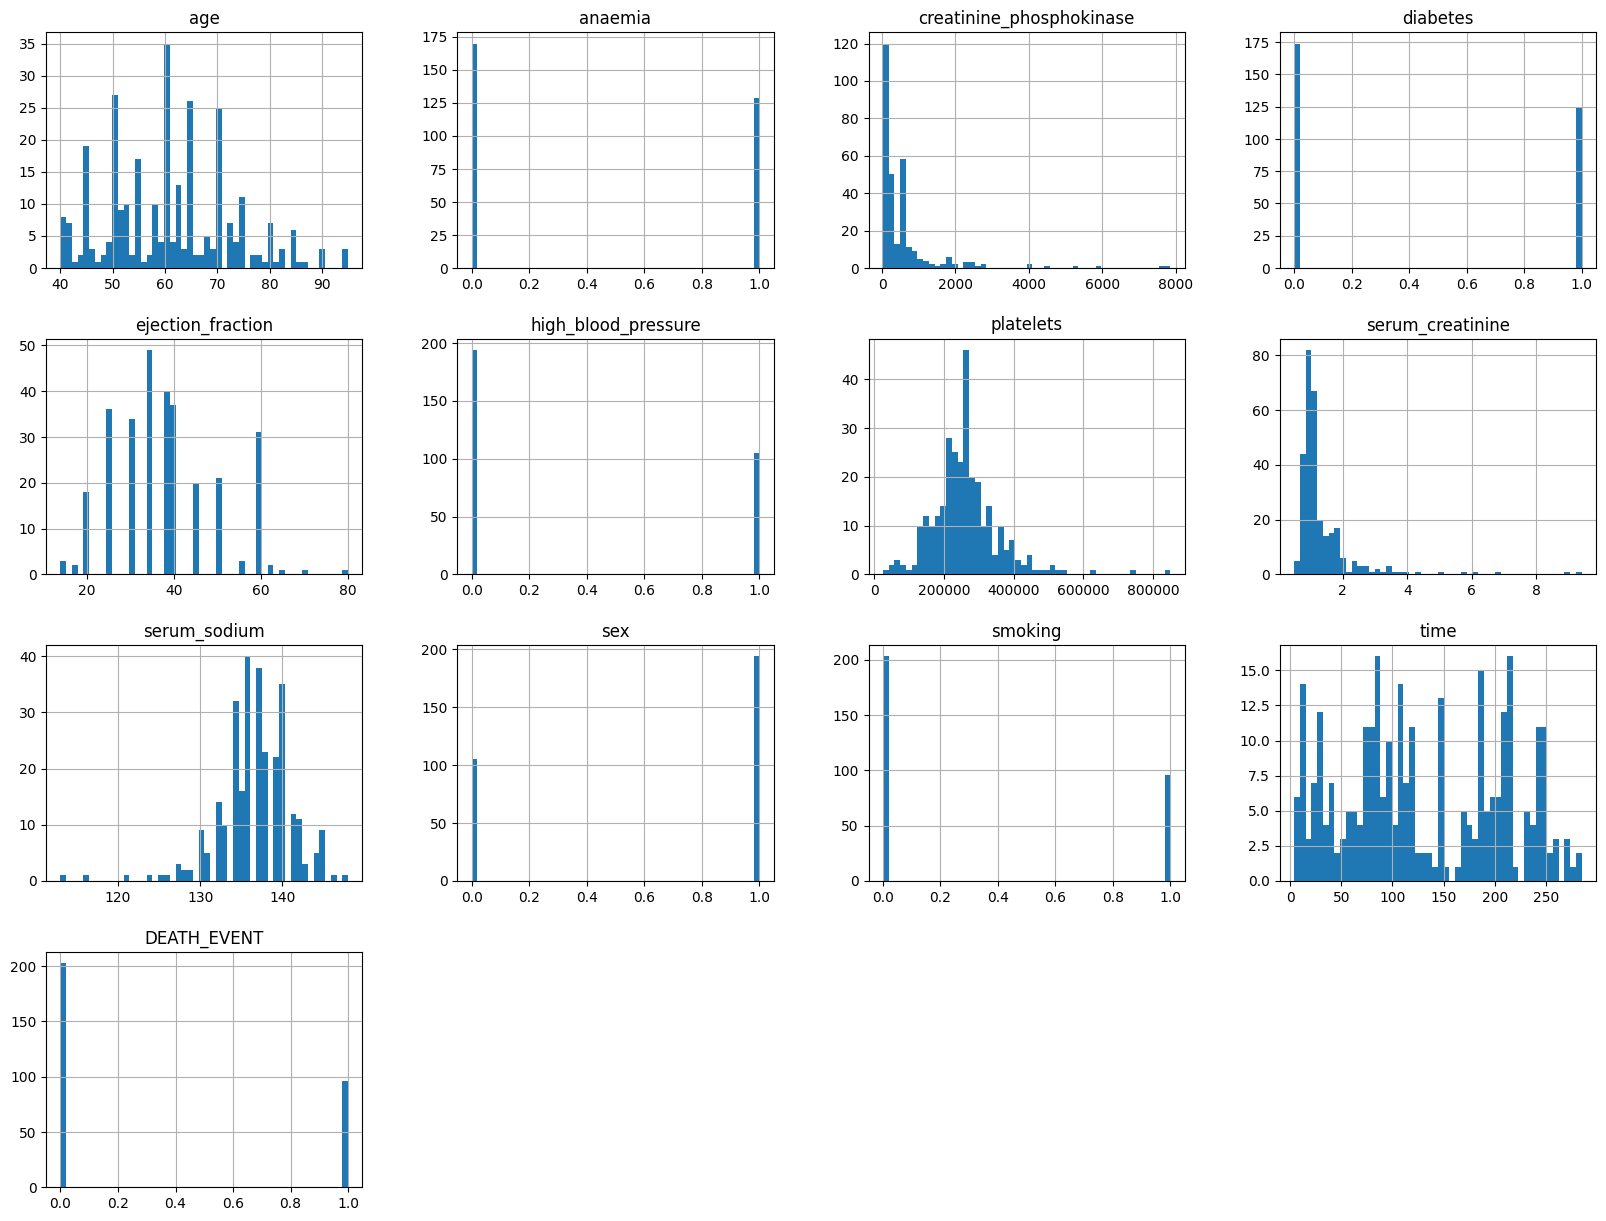

In [114]:
survey.hist(bins=50, figsize=(20,15))

From the histograms visible above, I can see that age of the patients suggests that the dataset has a higher number of patients in the age group of 50 - 70. There are some other information that can be extracted from the histograms but I will not go into detail for now. I will move on to the next step.

## Target 2
I want to find out the correlation between the age and death event. I will plot the age vs death event to see if there is a correlation. As most people die at an older age, I expect to see a correlation between the age and death event.

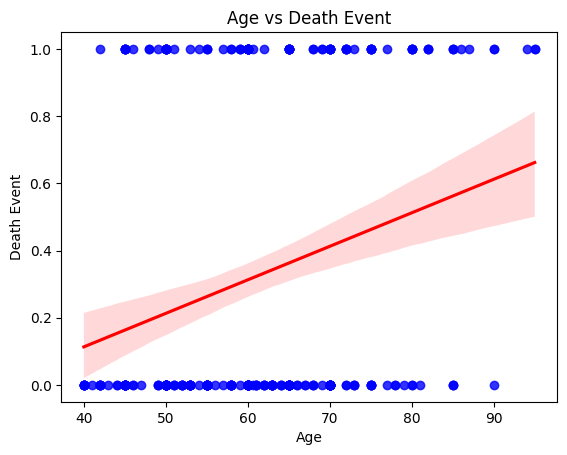

In [115]:
import seaborn as sns

age = survey['age']
death_event = survey['DEATH_EVENT']

df = pd.DataFrame(age, death_event)
sns.regplot(x=age, y=death_event, data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Age")
plt.ylabel("Death Event")
plt.title("Age vs Death Event")
plt.show()


##Target 3
I will analyze the correlation between the numerical variables. I will use a heatmap to visualize the correlation between the numerical variables. I will use the correlation matrix to create the heatmap.

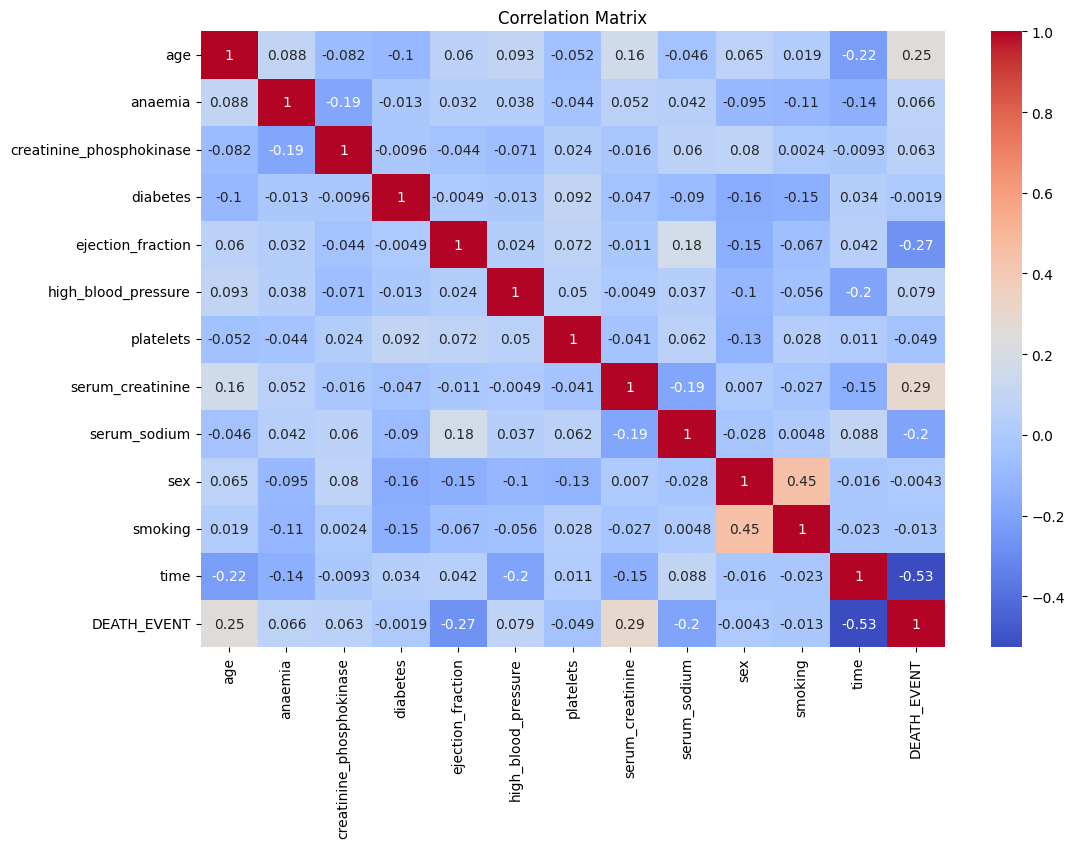

In [116]:
correlation_matrix = survey.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

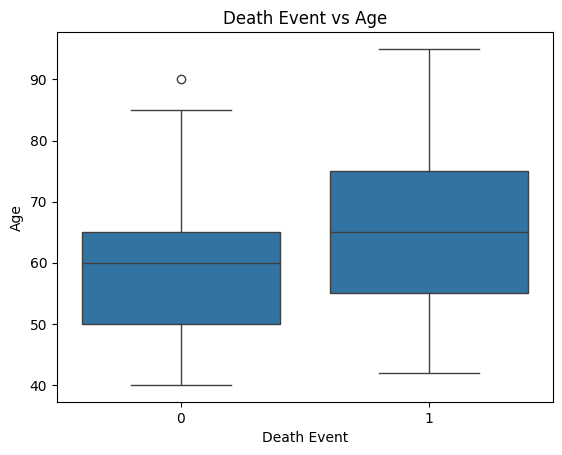

In [117]:
sns.boxplot(x='DEATH_EVENT', y='age', data=survey)
plt.xlabel("Death Event")
plt.ylabel("Age")
plt.title("Death Event vs Age")
plt.show()

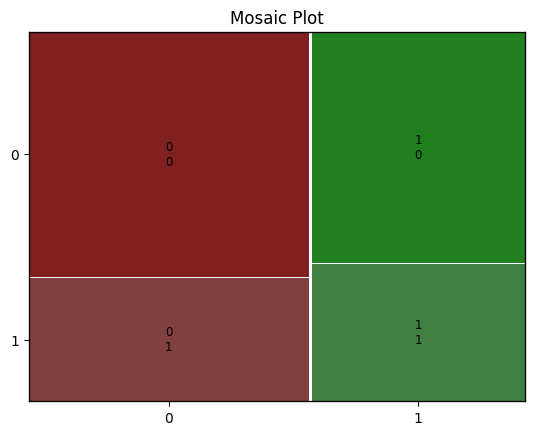

In [118]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(survey, ['anaemia', 'high_blood_pressure'], title='Mosaic Plot')
plt.show()

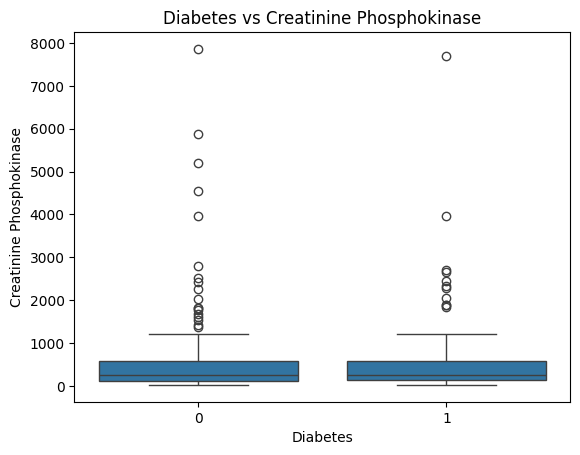

In [119]:
sns.boxplot(x='diabetes', y='creatinine_phosphokinase', data=survey)
plt.xlabel("Diabetes")
plt.ylabel("Creatinine Phosphokinase")
plt.title("Diabetes vs Creatinine Phosphokinase")
plt.show()


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = survey.drop(columns=['DEATH_EVENT'], axis=1) # features
y = survey['DEATH_EVENT'] # target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

X_train shape: (239, 12)
X_test shape: (60, 12)
Accuracy: 0.75


In [121]:
predictions = rfc.predict(X_test.head())
print("Predictions:", predictions)

# virtual patient
patient_data = {
    'age': 70,
    'anaemia': 1,
    'creatinine_phosphokinase': 120, 
    'diabetes': 0,  
    'ejection_fraction': 35,  # percent
    'high_blood_pressure': 1,  
    'platelets': 200000,  # number of platelets in the blood
    'serum_creatinine': 1.5,  # units
    'serum_sodium': 135,  # units
    'sex': 1,  # 1 - man
    'smoking': 0,
    'time': 4  # observation period in days
}

patient_data = pd.DataFrame(patient_data, index=[0])
predicted_event = rfc.predict(patient_data)

if predicted_event == 0:
    print("The virtual patient is not likely to die soon :)")
else:
    print("The virtual patient is likely to die soon :(")

Predictions: [0 0 0 1 0]
The virtual patient is likely to die soon :(
